# Modeling 

In [1]:
import pandas as pd

df = pd.read_csv('modeling.csv')
df.head(5)

,institution_code,loan_amount,interest_rate,rate_spread,income,applicant_credit_score_type,property_value,action_taken
0,7,205000.0,0.000,0.000,49.0,9.0,0.0,4.0
1,7,305000.0,4.375,0.000,148.0,9.0,0.0,6.0
2,7,695000.0,0.000,0.000,275.0,2.0,0.0,3.0
3,7,205000.0,4.125,0.140,57.0,3.0,0.0,2.0
4,7,755000.0,5.625,-1.524,292.0,2.0,0.0,2.0


Accuracy: 0.6359196542752569
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.73      0.65     18853
           2       0.52      0.52      0.52     11178
           3       0.72      0.60      0.65     10932
           4       0.72      0.67      0.69     10084
           5       0.82      0.85      0.84      9409
           6       0.64      0.67      0.65      6744
           7       0.79      0.76      0.77      6649
           8       0.52      0.45      0.48      6530
           9       0.63      0.61      0.62      5213
          10       0.33      0.21      0.26      5116

    accuracy                           0.64     90708
   macro avg       0.63      0.61      0.61     90708
weighted avg       0.63      0.64      0.63     90708



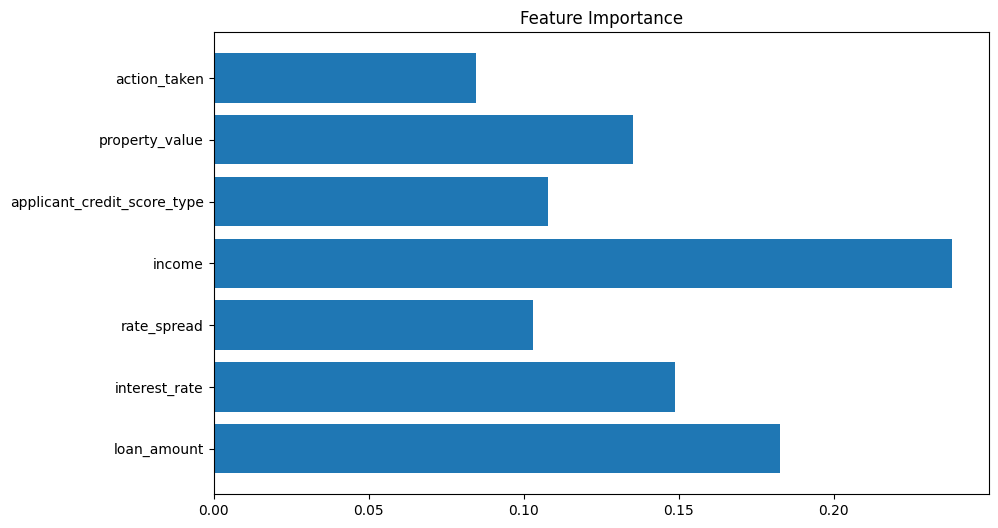

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['applicant_credit_score_type'] = label_encoder.fit_transform(df['applicant_credit_score_type'])
df['action_taken'] = label_encoder.fit_transform(df['action_taken'])

X = df.drop(columns=['institution_code'])  # Features
y = df['institution_code']  # Target (institution_code)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier (you can adjust hyperparameters)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (Optional)
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance')
plt.show()